In [25]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [254]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
%matplotlib inline
import sys
sys.path.append("/Users/markov/Dropbox/Research/OnGoing_Research/Snapshot/Python_experiment/source") 
import Discrete_Doucet_system
reload(Discrete_Doucet_system)

<module 'Discrete_Doucet_system' from '/Users/markov/Dropbox/Research/OnGoing_Research/Snapshot/Python_experiment/source/Discrete_Doucet_system.py'>

In [255]:
dsystem = Discrete_Doucet_system.Discrete_Doucet_system()
dsystem.theta, dsystem.sigma


(array([  0. ,   0.5,  25. ,   6. ,   0.2]), array([ 3.16227766,  2.23606798]))

In [263]:
init = -1.5
Nx0 = 30000

x0 = np.array([init]*Nx0 )
x0 = np.random.normal(init,  np.sqrt(5) , Nx0)

In [345]:
T0 = 4
xnow = x0
pnow = np.power(x0 - init,2)
xmean = np.array([0.]*(T+1))
xmean2 = np.array([0.]*(T+1))

xmean[0] = np.mean(x0)
xmean2[0] = np.mean(x0)


for t  in range(1,T0+1,1):
    xnow, pnow = dsystem.update(xnow, pnow)
    xmean[t] = np.mean(xnow)
    xmean2[t] = np.mean(np.power(xnow,2))

    
simul  = Discrete_Doucet_system.Simulate(T = T0) 
powers = [1,2,3]
mmts = simul.moment_history(dsystem, powers, Nx = Nx0)

xnow

array([ 17.18472077, -14.81343707,  15.11792254, ...,  15.20566982,
        -2.23559086,   0.71529407])

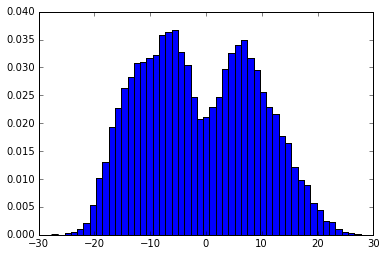

In [346]:
xplot= plt.hist(xnow,bins=50, normed=True)

In [349]:
T

12

ValueError: x and y must have same first dimension

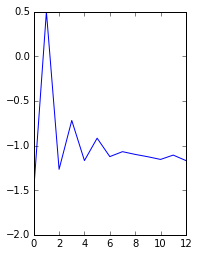

In [347]:
plt.subplot(1,2,0)
plt.plot(range(0,T+1,1), xmean)
plt.plot(range(0,T+1,1), mmts[0])
plt.subplot(1,2,1)
plt.plot(range(0,T+1,1), xmean2)
plt.plot(range(0,T+1,1), mmts[1])


In [333]:
mmts, xmean

(array([[ -1.48978297e+00,   4.96033808e-01,  -1.25584039e+00,
          -6.19948194e-01,  -1.11524762e+00,  -8.59076720e-01,
          -1.12579765e+00,  -9.97487249e-01,  -1.14509761e+00,
          -1.11778556e+00,  -1.22766773e+00,  -1.22210094e+00,
          -1.25399449e+00],
        [  7.15860154e+00,   9.24145833e+01,   6.28751887e+01,
           8.50449040e+01,   8.30158330e+01,   9.45797434e+01,
           9.38461249e+01,   1.01376535e+02,   1.02274366e+02,
           1.05351936e+02,   1.05237492e+02,   1.06742892e+02,
           1.08325330e+02],
        [ -2.54756307e+01,   9.65351204e+02,   1.20326253e+02,
           2.57261822e+02,   1.45388170e+01,   2.75986656e+01,
          -1.09473054e+02,  -1.00998515e+02,  -1.67779984e+02,
          -1.77356278e+02,  -2.21145200e+02,  -2.29295356e+02,
          -2.43783810e+02]]),
 array([-1.50367701,  0.47506508, -1.28554867, -0.67708719, -1.16135556,
        -0.88814397, -1.1040414 , -0.99051389, -1.11303187, -1.01896897,
        -1.1

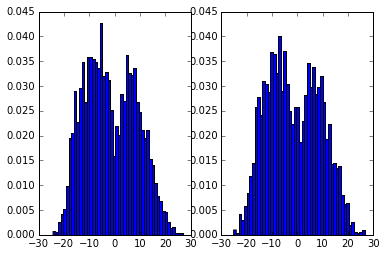

In [337]:
Nx_obs = 3000
Nx_dat = 3000
xobs = simul.simulate(dsystem, Nx = Nx_obs)
xdat = simul.simulate(dsystem, Nx = Nx_dat)
plt.subplot(1,2,0)
xplot= plt.hist(xobs[0],bins=50, normed=True)
plt.subplot(1,2,1)
xplot= plt.hist(xdat[0],bins=50, normed=True)

In [338]:
xdatmat = np.matrix([list(xdat[0])] * Nx_obs)
xobsmat = np.matrix([list(xobs[0])] * Nx_dat)
xdatmat.shape, xobsmat.shape

((3000, 3000), (3000, 3000))

In [339]:
diff = np.abs(xdatmat -np.transpose(xobsmat))
diffsqr = np.power(diff, 2)

In [340]:
diffsqr.shape

(3000, 3000)

In [341]:

pyx = np.exp(-(diffsqr  - np.transpose(np.matrix([[np.min(row) for row in diffsqr]]*Nx_dat))))


pyxm = np.matrix([row/np.sum(row) for row in pyx.tolist()])
px_new = np.array(np.sum(pyxm, 0))[0] 
px_new = px_new / sum(px_new)

In [342]:
Nx_resample = 500000
sample = np.random.multinomial(Nx_resample, px_new)

In [343]:
np.mean(px_new), np.var(px_new), np.mean(sample), np.var(sample), sum(sample)

(0.0003333333333333324,
 1.443440326418225e-09,
 166.66666666666666,
 522.5475555555555,
 500000)

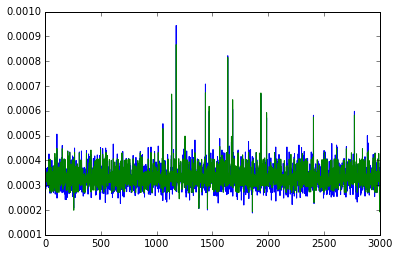

In [344]:
plt.plot(range(0, Nx_dat,1),np.double(sample)/Nx_resample)
plt.plot(range(0, Nx_dat,1),px_new)